In [1]:
import time
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install geneal
import numpy as np
import pandas as pd
from geneal.genetic_algorithms import ContinuousGenAlgSolver
flowdata = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario1')
d2 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario2')
d3 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario3')
d4 = pd.read_excel(r'./flowdata.xlsx', sheet_name='Scenario5')
flowdata = flowdata.append(d2, ignore_index=True)
flowdata = flowdata.append(d3, ignore_index=True)
flowdata = flowdata.append(d4, ignore_index=True)
flowdata = flowdata[['KTB', 'KTC', 'SKB', 'SKC']] # ensure columns ordering is correct

**Equation**:
$$w\times KTB+x\times KTC-y\times SKB-z\times SKC = m = KTB + KTC - SKB - SKC$$

where *m* is the observed mismatch between JRWW and SKL
- Each set of flow values observed for KTB, KTC, SKB, SKC can be geometrically represented as a line in 4-dimensional space mapped by w, x, y, z

$$w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)=0$$

- By iterating through *test_values* for w, x, y, z, we find the point (w,x,y,z) that minimises the sum of the distance between (w,x,y,z) and all the lines

$$\sum distance = \sum\frac{|w\times KTB+x\times KTC-y\times SKB-z\times SKC-(KTB + KTC - SKB - SKC)|}{\sqrt{KTB^2+KTC^2+SKB^2+SKC^2}}$$

- Find *num_results* number of sample points that provide the *num_results* lowest sum of distances
- Each of w, x, y, z is equal to $\frac{E}{1+E}$ where E is the actual flowmeter error

In [2]:
flowdata

,KTB,KTC,SKB,SKC
0,0.0,390.7,0.0,391.7
1,0.0,388.2,0.0,388.4
2,0.0,408.9,0.0,407.2
3,0.0,413.1,0.0,407.5
4,0.0,408.3,0.0,400.8
...,...,...,...,...
61,466.5,388.9,473.7,382.7
62,455.6,397.0,463.6,388.8
63,462.6,393.9,470.2,387.0
64,455.9,399.5,462.3,391.1


In [3]:
# prepare raw data
flowdata_temp = flowdata
# change the sign of SKB and SKC columns for simpler arithmetic
flowdata_temp['SKB'] *= -1
flowdata_temp['SKC'] *= -1
flowdata_array = flowdata_temp.to_numpy()

The following genetic algorithm attempts to find the best values of flowmeter errors E1, E2, E3, E4 that minimise the sum of the smallest euclidean distances between the final solution point and the lines formed by all the data provided.

Iteration: 100
Best fitness: -0.15660305169353647
Iteration: 200
Best fitness: -0.15660252898338953
Iteration: 300
Best fitness: -0.15660252754897583
Iteration: 400
Best fitness: -0.15660252754897494
Iteration: 500
Best fitness: -0.15660252754897494
Iteration: 600
Best fitness: -0.15660252754897494
Iteration: 700
Best fitness: -0.15660252754897494
Iteration: 800
Best fitness: -0.15660252754897494
Iteration: 900
Best fitness: -0.15660252754897494
Iteration: 1000
Best fitness: -0.15660252754897494


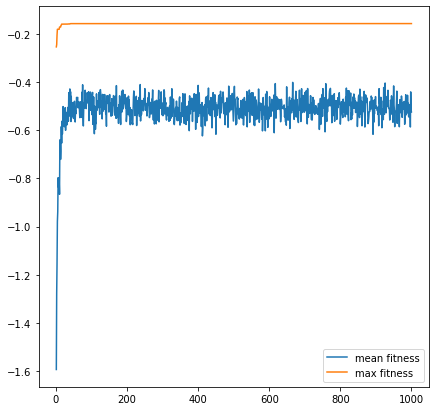


#############################
#			STATS			#
#############################


Total running time: 59 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.15660252754897494
Best individual: [-0.90906449  2.56814886  0.46300059  0.98332276]
CPU times: user 59.4 s, sys: 191 ms, total: 59.6 s
Wall time: 59.8 s


In [4]:
%%time

# genetic algorithm
def flow_fitness_function(data):
    def calc_dist(errors):
        sum_of_dist = 0
        #convert errors into variables (w,x,y,z)
        wxyz = np.array(list(map(lambda t:(0.01*t/(1+0.01*t)), errors)))
        for params in data:
            m = sum(params) # mismatch
            dist = abs(np.dot(params, wxyz) - m)/np.linalg.norm(params)
            sum_of_dist += dist
        return -sum_of_dist #inverse because GA maximises the function
    return calc_dist

solver = ContinuousGenAlgSolver(
    n_genes = 4,
    fitness_function = flow_fitness_function(flowdata_array),
    variables_limits = (-5,5)
)

solver.solve()

Iteration: 100
Best fitness: -0.15704541641714273
Iteration: 200
Best fitness: -0.1549877386164773
Iteration: 300
Best fitness: -0.1549877386164773
Iteration: 400
Best fitness: -0.1549877386164773
Iteration: 500
Best fitness: -0.1549877386164773
Iteration: 600
Best fitness: -0.1549877386164773
Iteration: 700
Best fitness: -0.1549877386164773
Iteration: 800
Best fitness: -0.1549877386164773
Iteration: 900
Best fitness: -0.1549877386164773
Iteration: 1000
Best fitness: -0.1549876774997052


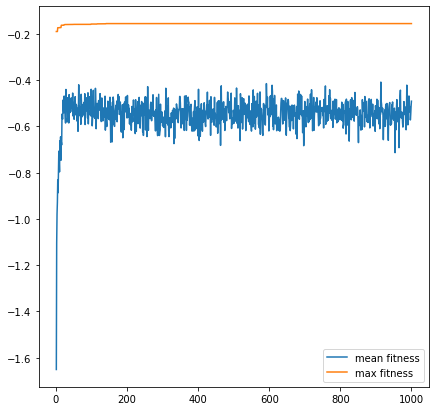


#############################
#			STATS			#
#############################


Total running time: 58 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.1549876774997052
Best individual: [0.12486128 3.6408666  1.51372578 2.03641759]


In [5]:
solver.solve()

Iteration: 100
Best fitness: -0.15663295298156263
Iteration: 200
Best fitness: -0.15663053718283818
Iteration: 300
Best fitness: -0.15663053718283818
Iteration: 400
Best fitness: -0.15663053718283818
Iteration: 500
Best fitness: -0.15663053718283818
Iteration: 600
Best fitness: -0.15663053718283818
Iteration: 700
Best fitness: -0.15662937630851714
Iteration: 800
Best fitness: -0.1558257619447671
Iteration: 900
Best fitness: -0.15477386865710552
Iteration: 1000
Best fitness: -0.15477386854792932


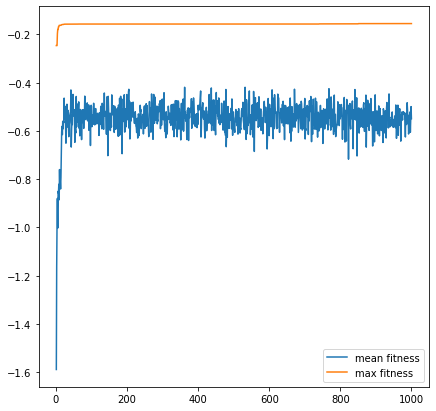


#############################
#			STATS			#
#############################


Total running time: 58 seconds


Population size: 100
Number variables: 4
Selection rate: 0.5
Mutation rate: 0.15
Number Generations: 1000

Best fitness: -0.15477386854792932
Best individual: [0.34876534 3.82405683 1.78028288 2.20076055]


In [6]:
solver.solve()